# Market Basket Analysis - mlxtend

In [66]:
import pandas as pd
import numpy as np
import mlxtend
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import association_rules, apriori

### Create "basket", import and create pivot table

In [104]:
basket = pd.read_csv('MBA_Data.csv',sep=';')

In [106]:
basket

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09.12.2011 12:50,"0,85",12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09.12.2011 12:50,"2,1",12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09.12.2011 12:50,"4,15",12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09.12.2011 12:50,"4,15",12680.0,France


In [107]:
#only need to look at bill num and item, rename for commonalitiy
basket.drop(columns=['Quantity','Date','Price','CustomerID','Country'],inplace = True)
basket.rename(columns={'BillNo':'billNo','Itemname':'itemName'},inplace=True)
basket

,billNo,itemName
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS
522060,581587,CHILDREN'S APRON DOLLY GIRL
522061,581587,CHILDRENS CUTLERY DOLLY GIRL
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE


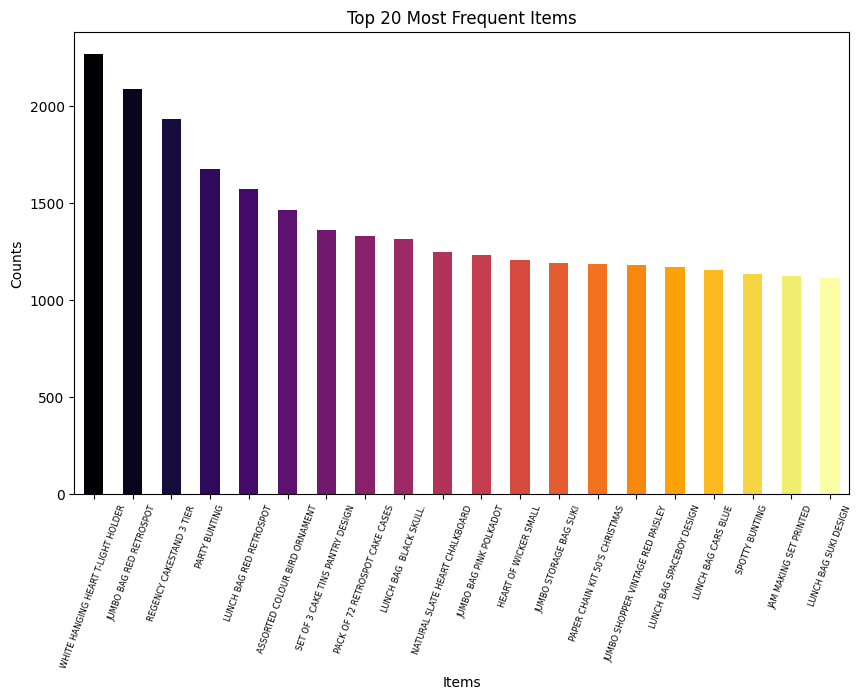

In [186]:
plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,20))
top20=basket['itemName'].value_counts().head(20)
top20.plot.bar(color = color)
plt.title('Top 20 Most Frequent Items')
plt.ylabel('Counts')
plt.xlabel('Items')
plt.xticks(rotation=70,fontsize= 6)
plt.show()

In [70]:
print(basket['billNo'].nunique())
print(basket['billNo'].isnull().sum())

21665
0


In [71]:
print(basket['itemName'].nunique())
print(basket['itemName'].isnull().sum())
basket.dropna(inplace=True)
print(basket['itemName'].isnull().sum())
print(basket['billNo'].nunique())

4185
1455
0
20210


##### Above, checked for unique and null values in each column. After dropping any null values, we are left with 1455 itemNames, this will be our rows, and 20210 billNos, this means there are repeats of billNo, meaning same order, so those will need to be grouped together.

In [72]:
basket = basket.groupby(by=['billNo', 'itemName'])['itemName'].count().reset_index(name='Item_Count')
basket = basket.pivot_table(index='billNo', columns='itemName', values='Item_Count', aggfunc='sum').fillna(0).astype(bool)
basket

itemName,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
billNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572057,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
572058,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A563185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##### At the end of the rows, we can see some funky itemNames for incorrectly codded/sold items. We will remove these so they don't influence the relationship rules. This can easily be done because they are all in lower case.

In [76]:
rmv_cols = [col for col in basket.columns if col.islower()]

In [77]:
basket.drop(columns=rmv_cols,inplace=True)
basket

itemName,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
billNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572057,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
572058,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A563185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##### There were a couple straglers that had capitals, these will be removed by hard coding

In [74]:
basket.drop(columns=['damages/credits from ASOS.','incorrectly credited C550456 see 47','mystery! Only ever imported 1800'],inplace=True)
basket

itemName,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
billNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572057,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
572058,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A563185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Perform MBA - Apriori

##### Now that the pivot table is made, the item sets can be created, we will use apriori first from the mlxtend library, which simply generates a list of all possible item sets. Initially ran with a support of 0.01, but this crashed the kernel from the size, so increased slightly and got more reasonable numbers

In [84]:
support = 0.02
frequent_items = apriori(basket, min_support=support, use_colnames=True)
frequent_items.sort_values('support', ascending=False)

,support,itemsets
263,0.108956,(WHITE HANGING HEART T-LIGHT HOLDER)
97,0.102128,(JUMBO BAG RED RETROSPOT)
190,0.094211,(REGENCY CAKESTAND 3 TIER)
151,0.081940,(PARTY BUNTING)
122,0.076249,(LUNCH BAG RED RETROSPOT)
...,...,...
274,0.020139,(WOODEN UNION JACK BUNTING)
245,0.020139,(STRAWBERRY SHOPPER BAG)
219,0.020139,(SET OF 60 I LOVE LONDON CAKE CASES)
195,0.020040,(RIBBON REEL STRIPES DESIGN)


##### After the sets are made we can mine the association rules, we will use the lift metric to find those with only positive correlation. I've also added an additional column that includes the len of the antecedent, so we know when there are groups of items that should be purchased in order for the consqeuent to be purchased

In [85]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.sort_values(by=['support'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
47,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.102128,0.059921,0.040524,0.396802,6.622110,0.034405,1.558493,0.945558,1
46,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.059921,0.102128,0.040524,0.676301,6.622110,0.034405,2.773784,0.903106,1
29,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.050124,0.048243,0.036170,0.721619,14.957866,0.033752,3.418899,0.982386,1
28,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.048243,0.050124,0.036170,0.749744,14.957866,0.033752,3.795612,0.980446,1
72,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.102128,0.058288,0.035675,0.349322,5.993032,0.029723,1.447277,0.927904,1
...,...,...,...,...,...,...,...,...,...,...,...
86,(LUNCH BAG BLACK SKULL.),(LUNCH BAG APPLE DESIGN),0.062345,0.050569,0.020336,0.326190,6.450401,0.017184,1.409050,0.901154,1
9,(CHARLOTTE BAG SUKI DESIGN),(CHARLOTTE BAG PINK POLKADOT),0.043295,0.036517,0.020188,0.466286,12.769152,0.018607,1.805242,0.963397,1
8,(CHARLOTTE BAG PINK POLKADOT),(CHARLOTTE BAG SUKI DESIGN),0.036517,0.043295,0.020188,0.552846,12.769152,0.018607,2.139539,0.956619,1
149,(WOODEN PICTURE FRAME WHITE FINISH),(WHITE HANGING HEART T-LIGHT HOLDER),0.054033,0.108956,0.020040,0.370879,3.403936,0.014152,1.416332,0.746561,1


##### Now that the rules have been generated we can pick and choose the values we want to look at for recommmendations in how to sell the items. One interesting thing I looked at below is if we look at only rules with an antecedent_len >= 2, so a grouping, what other items have a support and confidence value in the top quartile

In [86]:
rules[rules['antecedent_len']>=2][['support','confidence']].describe()

,support,confidence
count,6.000000,6.000000
mean,0.022934,0.722550
std,0.002791,0.159306
min,0.020386,0.503053
25%,0.020386,0.604700
50%,0.022934,0.753035
75%,0.025482,0.838819
max,0.025482,0.903509


In [87]:
rules[(rules['antecedent_len'] >= 2) &(rules['confidence'] > 0.8) &(rules['support'] >0.025)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
152,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.029936,0.050124,0.025482,0.851240,16.982778,0.023982,6.385280,0.970159,2
153,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.028204,0.048243,0.025482,0.903509,18.728115,0.024122,9.863659,0.974077,2


##### We only have two results from this selection and they actually relate to each other, we have a grouping of three teacups & saucers represented in two ways with one being the green and pink saucer being the antecedent and the roses being the consequent, and the other has the roses and pink as the ante and the green as the consequent. With this information we could turn around and tell the store/client that selling these three as a package or placing them near each other could encourage people to buy more and increase sales. 

### Perform MBA - FP Growth

##### To see if there would be any different results in using a faster rule algorithm we will implement FP growth, which uses frequent pattern tree to find the itemsets and thus makes the algroithm run much faster

In [90]:
from mlxtend.frequent_patterns import fpgrowth

frequent_items_fp = fpgrowth(basket, min_support=0.02, use_colnames=True)
frequent_items_fp.sort_values('support', ascending=False)

,support,itemsets
0,0.108956,(WHITE HANGING HEART T-LIGHT HOLDER)
65,0.102128,(JUMBO BAG RED RETROSPOT)
155,0.094211,(REGENCY CAKESTAND 3 TIER)
224,0.081940,(PARTY BUNTING)
29,0.076249,(LUNCH BAG RED RETROSPOT)
...,...,...
263,0.020139,(SET OF 60 I LOVE LONDON CAKE CASES)
127,0.020139,(STRAWBERRY SHOPPER BAG)
211,0.020139,(WOODEN UNION JACK BUNTING)
154,0.020040,(RIBBON REEL STRIPES DESIGN)


In [93]:
pd.concat([frequent_items,frequent_items_fp]).drop_duplicates(keep=False) 

,support,itemsets


##### Since there are no differences between the two frequent item sets, the algorithms produced the same results

In [94]:
frequent_items_fp = fpgrowth(basket, min_support=0.01, use_colnames=True)
frequent_items_fp.sort_values('support', ascending=False)

,support,itemsets
0,0.108956,(WHITE HANGING HEART T-LIGHT HOLDER)
92,0.102128,(JUMBO BAG RED RETROSPOT)
294,0.094211,(REGENCY CAKESTAND 3 TIER)
576,0.081940,(PARTY BUNTING)
42,0.076249,(LUNCH BAG RED RETROSPOT)
...,...,...
1661,0.010045,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS..."
1092,0.010045,"(LUNCH BAG BLACK SKULL., LUNCH BAG SUKI DESIG..."
1283,0.010045,"(GREEN REGENCY TEACUP AND SAUCER, VICTORIAN GL..."
1204,0.010045,"(JUMBO BAG OWLS, JUMBO BAG RED RETROSPOT, JUMB..."


In [102]:
rules_fp = association_rules(frequent_items_fp, metric="support", min_threshold=0)
rules_fp["antecedent_len"] = rules_fp["antecedents"].apply(lambda x: len(x))
rules_fp[(rules_fp['support'] <= 0.02)].sort_values(by=['support'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
393,(STRAWBERRY CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.035428,0.040920,0.019990,0.564246,13.788885,0.018540,2.200965,0.961543,1
392,(WOODLAND CHARLOTTE BAG),(STRAWBERRY CHARLOTTE BAG),0.040920,0.035428,0.019990,0.488513,13.788885,0.018540,1.885818,0.967050,1
2371,(SET OF 3 CAKE TINS PANTRY DESIGN),(SET OF 6 SPICE TINS PANTRY DESIGN),0.066601,0.040228,0.019891,0.298663,7.424321,0.017212,1.368489,0.927050,1
2370,(SET OF 6 SPICE TINS PANTRY DESIGN),(SET OF 3 CAKE TINS PANTRY DESIGN),0.040228,0.066601,0.019891,0.494465,7.424321,0.017212,1.846359,0.901576,1
2868,(JUMBO BAG APPLES),(JUMBO BAG PEARS),0.047699,0.028996,0.019842,0.415975,14.346172,0.018459,1.662608,0.976892,1
...,...,...,...,...,...,...,...,...,...,...,...
503,"(WOODLAND CHARLOTTE BAG, STRAWBERRY CHARLOTTE ...","(CHARLOTTE BAG PINK POLKADOT, CHARLOTTE BAG SU...",0.019990,0.016230,0.010045,0.502475,30.960441,0.009720,1.977330,0.987440,2
504,"(CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...","(CHARLOTTE BAG SUKI DESIGN, WOODLAND CHARLOTTE...",0.018654,0.016526,0.010045,0.538462,32.581760,0.009736,2.130859,0.987733,2
505,"(CHARLOTTE BAG SUKI DESIGN, STRAWBERRY CHARLOT...","(CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT...",0.020386,0.016032,0.010045,0.492718,30.734073,0.009718,1.939689,0.987596,2
506,"(STRAWBERRY CHARLOTTE BAG, RED RETROSPOT CHARL...","(CHARLOTTE BAG PINK POLKADOT, CHARLOTTE BAG SU...",0.023850,0.014349,0.010045,0.421162,29.350622,0.009702,1.702809,0.989529,2


##### One benefit of the FP growth algorithm is it runs fast enough to find itemsets of lower support, this gives more options for the client, however these extra itemsets cover fewer likly purchases and so would be for more a a niche itemset

##### The last step for this project is to use the top 20 items sold, which we found at the beginning, and find the rules which apply to these. This would be valuable to the customer as they could decide what to sell next to or combined in a promotion with some of their best sellers

In [187]:
top20 = top20.index.tolist()
top20

['WHITE HANGING HEART T-LIGHT HOLDER',
 'JUMBO BAG RED RETROSPOT',
 'REGENCY CAKESTAND 3 TIER',
 'PARTY BUNTING',
 'LUNCH BAG RED RETROSPOT',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'SET OF 3 CAKE TINS PANTRY DESIGN',
 'PACK OF 72 RETROSPOT CAKE CASES',
 'LUNCH BAG  BLACK SKULL.',
 'NATURAL SLATE HEART CHALKBOARD',
 'JUMBO BAG PINK POLKADOT',
 'HEART OF WICKER SMALL',
 'JUMBO STORAGE BAG SUKI',
 "PAPER CHAIN KIT 50'S CHRISTMAS",
 'JUMBO SHOPPER VINTAGE RED PAISLEY',
 'LUNCH BAG SPACEBOY DESIGN',
 'LUNCH BAG CARS BLUE',
 'SPOTTY BUNTING',
 'JAM MAKING SET PRINTED',
 'LUNCH BAG SUKI DESIGN']

In [203]:
match = set(top20)
rules_fp['match'] = [not match.isdisjoint(x) for x in rules_fp['antecedents']]

In [205]:
top20_rules = rules_fp[rules_fp['match']==True].drop(columns='match').reset_index(drop=True)
top20_rules.sort_values(by=['confidence'], ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
0,"(SUKI SHOULDER BAG, JAM MAKING SET PRINTED)",(DOTCOM POSTAGE),0.010787,0.035032,0.010341,0.958716,27.366726,0.009964,23.373665,0.973965,2
1,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.015289,0.048243,0.013855,0.906149,18.782840,0.013117,10.141130,0.961460,3
2,"(JUMBO BAG RED RETROSPOT, SUKI SHOULDER BAG)",(DOTCOM POSTAGE),0.013904,0.035032,0.012321,0.886121,25.294499,0.011834,8.473624,0.974008,2
3,"(JUMBO BAG PINK POLKADOT, JUMBO BAG BAROQUE B...",(JUMBO BAG RED RETROSPOT),0.011628,0.102128,0.010143,0.872340,8.541667,0.008956,7.033333,0.893314,3
4,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",(GREEN REGENCY TEACUP AND SAUCER),0.018308,0.048243,0.015933,0.870270,18.039141,0.015049,7.336457,0.962180,2
...,...,...,...,...,...,...,...,...,...,...,...
1428,(WHITE HANGING HEART T-LIGHT HOLDER),(60 TEATIME FAIRY CAKE CASES),0.108956,0.039485,0.010143,0.093097,2.357762,0.005841,1.059115,0.646286,1
1429,(WHITE HANGING HEART T-LIGHT HOLDER),(ZINC METAL HEART DECORATION),0.108956,0.025878,0.010143,0.093097,3.597503,0.007324,1.074119,0.810318,1
1430,(WHITE HANGING HEART T-LIGHT HOLDER),(WOOD BLACK BOARD ANT WHITE FINISH),0.108956,0.033053,0.010094,0.092643,2.802868,0.006493,1.065674,0.721875,1
1431,(WHITE HANGING HEART T-LIGHT HOLDER),(PAPER CHAIN KIT 50'S CHRISTMAS),0.108956,0.056556,0.010094,0.092643,1.638072,0.003932,1.039771,0.437157,1


##### The above dataframe is the final result of searching for all antecedents which match with the top 20 sold items, none of them have very high support, but there are some with very high confidence and could be recommended as promotions or positioned near each other for sales.